# 数据合适 截止到10dB 图形最好

2023-05-25 12:03:12.718421: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|        -5.0|  7.448e-01|  3.151e-01|             242|     6.458e-01|     2.344e-01|                180|   6.615e-01|   2.279e-01|              175|      1.510e+01|
|       CODED|  7.057e-01|  3.776e-01|             290|     5.990e-01|     2.773e-01|                213|   5.833e-01|   3.073e-01|          

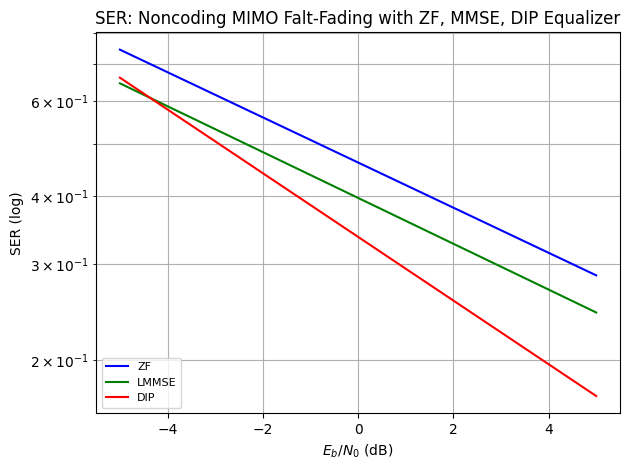

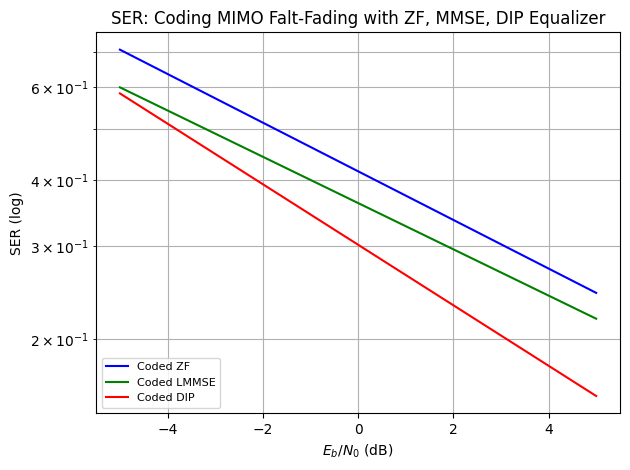

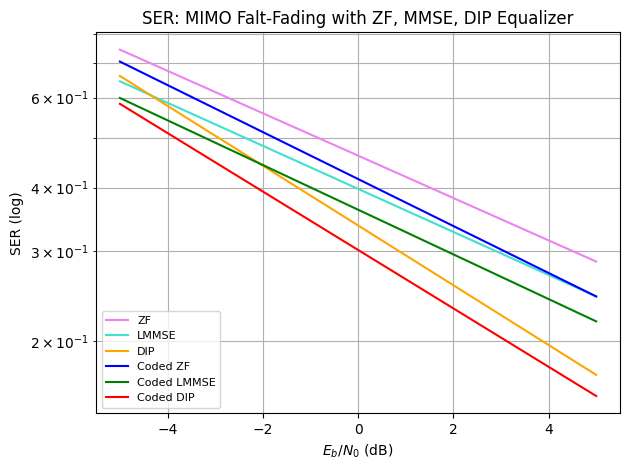

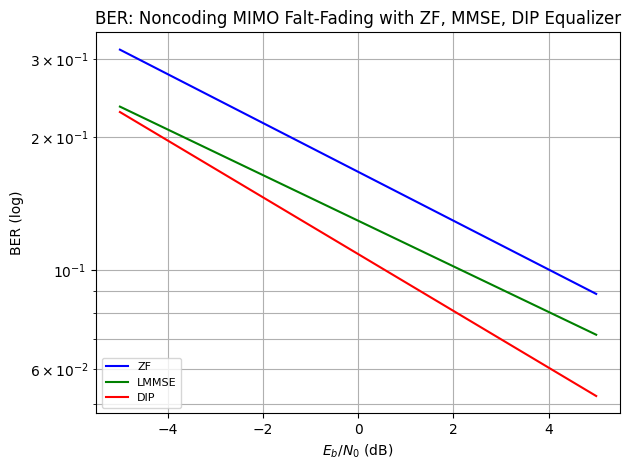

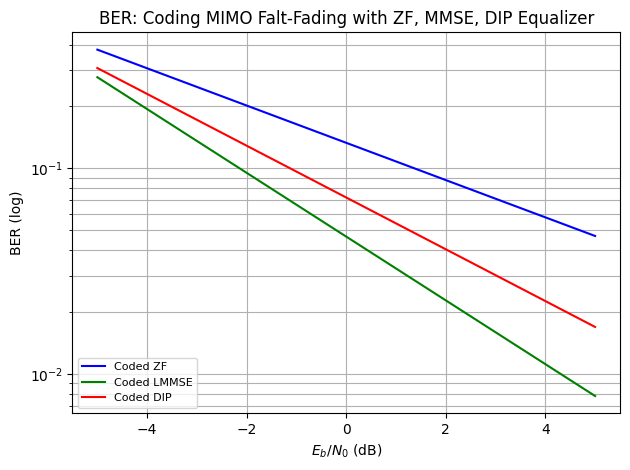

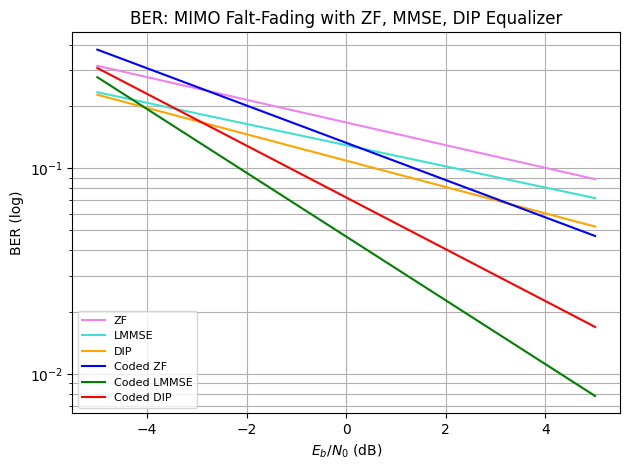

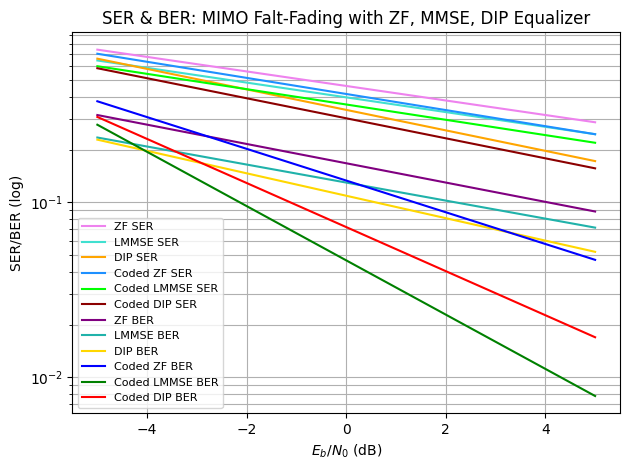

Loading BokehJS ...

(array([-5.,  5.]),
 array([0.74479167, 0.28645833]),
 array([0.64583333, 0.24479167]),
 array([0.66145833, 0.171875  ]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from CodedSystemFlatFading import CodedSystemFlatFading

Block_Length = 32          # Block Length (k)
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 4             # Receive Antennas
CODERATE = 0.5             # Code Rate

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 6            # Number of Parallelly Processed Batches
EBN0_DB_MIN = -5.0         # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 5.0          # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 2        # EBNO Points

model_coded_ff = CodedSystemFlatFading(Block_Length, 
                                       NUM_BITS_PER_SYMBOL,
                                       CONSTELLATION_TYPE,
                                       DEMAPPING_METHOD,
                                       NUM_RX_ANT,
                                       NUM_TX_ANT,
                                       CODERATE)

model_coded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)